This Jupyter notebook just shows the same deal happening in the cursed Excel sheet but with code.

The purpose of this is to show those with some code experience how to work with the data, and maybe to show those who don't use code how much more feasible doing this kind of process is with code rather than Excel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load in the datamframe/table
data = pd.read_excel('dff-visualisation.xlsx', sheet_name='g example')

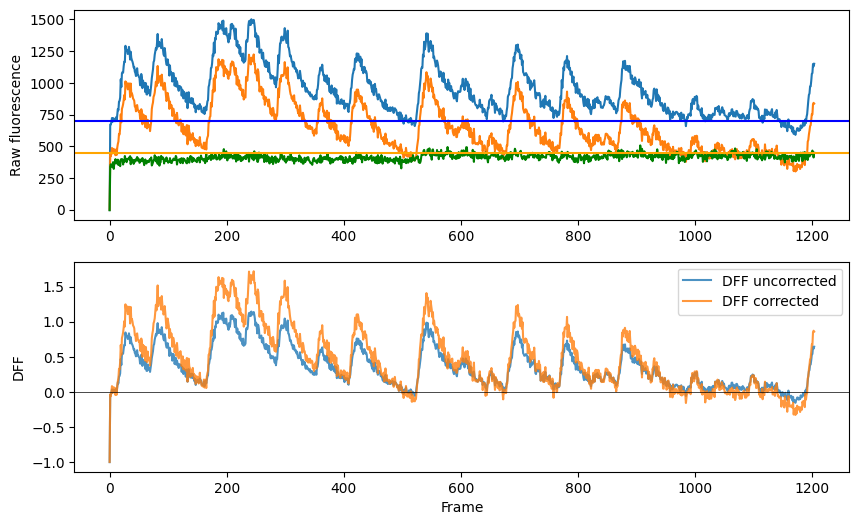

In [2]:
rawf = data['Mean']

f0 = 700  # this could also be an array of some sort (and automatically calculated)
dff_uncorrected = (rawf - f0) / f0

neuF = data['fneuropil']
neu_factor = 0.7
rawf_corrected = rawf - neuF * neu_factor

f0_corrected = 450
dff_corrected = (rawf_corrected - f0_corrected) / f0_corrected

# Plot our results
plt.figure(figsize=(10, 6))
ax_f = plt.subplot(2,1,1)
ax_f.plot(rawf, label='Mean')
ax_f.plot(rawf_corrected, label='Mean Corrected')
ax_f.plot(neuF, label='Neuropil', c='green')
ax_f.axhline(f0, c='blue')
ax_f.axhline(f0_corrected, c='orange')
ax_f.set_ylabel('Raw fluorescence')

ax_dff = plt.subplot(2,1,2)
ax_dff.plot(dff_uncorrected, alpha=0.8, label='DFF uncorrected')
ax_dff.plot(dff_corrected, alpha=0.8, label='DFF corrected')
ax_dff.set_xlabel('Frame')

ax_dff.axhline(0, c='k', lw=0.5)  # a 0 line for aesthetics
ax_dff.set_ylabel('DFF')
ax_dff.legend()
plt.show()

Alright, let's talk event detection. You can see it's most basic form below, and it kinda sucks. There are all kinds of problems you can immediately see in the trace. Have a think about what some of the problems are, and how they might be solved, and then have a read of the Method section I've referred to.

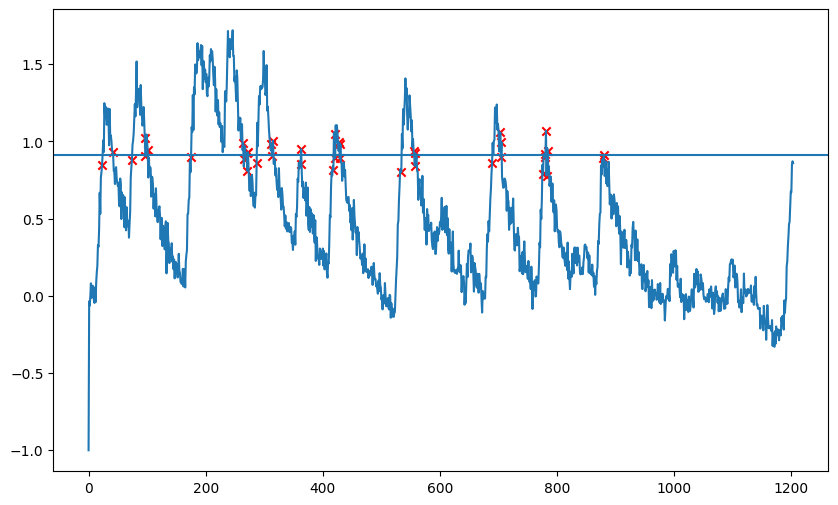

In [6]:
ftrace = dff_corrected
threshold = ftrace.std() * 2
crossings = np.where(np.diff(np.sign(ftrace - threshold)))[0]

plt.figure(figsize=(10, 6))
plt.plot(ftrace)
plt.axhline(threshold)
plt.scatter(crossings, ftrace[crossings], c='r', marker='x')
plt.show()

How do you define the threshold? What about using a derivative instead, or together?

Take this from Beauleiu-Laroche et al. (2019):

> To compute DF/F, the baseline F was estimated as the 10th percentile of the fluorescence using a 160 s rolling-window. For figure display, signals were low-pass filtered at 4 Hz with zero-phase filtering using the MATLAB function filtfilt.
> 
> To detect transients, we first computed the mean and standard deviation of the raw signal without transients (< 0.2 DF/F) and defined threshold A as 3 standard deviations above the mean and threshold B as 1 standard deviation above the mean. We then low-pass filtered (filtfilt) the raw signal at 2 Hz and identified transients as points that were above threshold A. The start and end of each transient were defined as the points in the filtered signal that crossed threshold B. Overlapping transient were combined. To compare the paired and unpaired transient integrals, only cells with both paired and unpaired transients were used. 
> 
> To detect events and decays, we computed the derivative of the filtered signal and low-pass filtered (filtfilt) it at 0.5 Hz. Rise events were identified as points in the filtered signals that were above threshold A and where the derivative was positive. The start and end of each event were defined as the points in the filtered signal that crossed threshold B or where the derivative crossed zero. Decay events were identified as points in the filtered signals that were above threshold A and where the derivative was negative. The start and end of each event were defined as the points in the filtered signal that crossed threshold B or where the derivative crossed zero. Overlapping events were combined.

Instead of MATLAB's `filtfilt`, you might use `scipy.signal.savgol`. They don't mention performing any smoothing, which might be fine if all of their fluorescence signals have very low amounts of noise/artefact.

Implementing this in its entirety is out of scope for this demo, but maybe you want to take a look at how `np.diff` can be used to define events in terms of their rise, and to find rise events that occur "on the back" of another event.
